In [1]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:/Users/minhcq/AppData/data/simple-machine-learning-examples-master/examples_using_a_real_dataset/adults.txt')

In [3]:
df.head()


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [6]:
df['edu']=LabelEncoder().fit_transform(df['education'])

In [7]:

df['workclass_model']=LabelEncoder().fit_transform(df['workclass'])

In [8]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
x_train = df[['age','edu','workclass_model','hours_per_week']].iloc[:30000]

In [10]:
y_train = list(df['salary'].iloc[:30000])

In [11]:
x_test = df[['age','edu','workclass_model','hours_per_week']].iloc[2561:]
y_test = list(df['salary'].iloc[2561:])

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
clf = clf.fit(x_train,y_train)

In [14]:
clf.predict([[20,13,6,40]])

array(['<=50K'], dtype='<U5')

In [15]:
clf.score(x_test, y_test)

0.8676333333333334

In [16]:
df.iloc[32554]

age                                53
workclass                     Private
final_weight                   321865
education                     Masters
education_num                      14
marital_status     Married-civ-spouse
occupation            Exec-managerial
relationship                  Husband
race                            White
sex                              Male
capital_gain                        0
capital_loss                        0
hours_per_week                     40
native_country          United-States
salary                           >50K
edu                                12
workclass_model                     4
Name: 32554, dtype: object

In [17]:
clf.predict([[53,12,4,40]])

array(['>50K'], dtype='<U5')

In [18]:
df.tail(10)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,edu,workclass_model
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K,0,4
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K,8,4
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,12,4
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,12,4
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K,15,4
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,7,4
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,11,4
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,11,4
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,11,4
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,11,5


In [19]:
prediction = clf.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, y_test)

In [21]:
cm

array([[22042,  3219],
       [  752,  3987]], dtype=int64)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
k_clf = KNeighborsClassifier()

In [24]:
k_clf = k_clf.fit(x_train,y_train)

In [25]:
kprediction = k_clf.predict(x_test)

In [26]:
k_clf.score(x_test, y_test)

0.8131666666666667

In [27]:
import tensorflow as tf

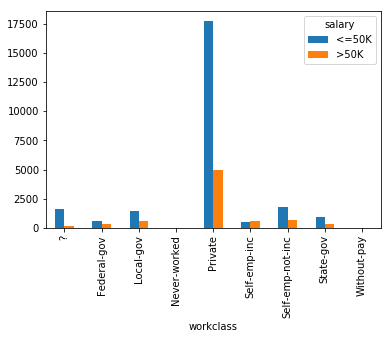

In [28]:
df.pivot_table(index=['workclass'],columns='salary',values='final_weight',aggfunc='count').plot.bar()

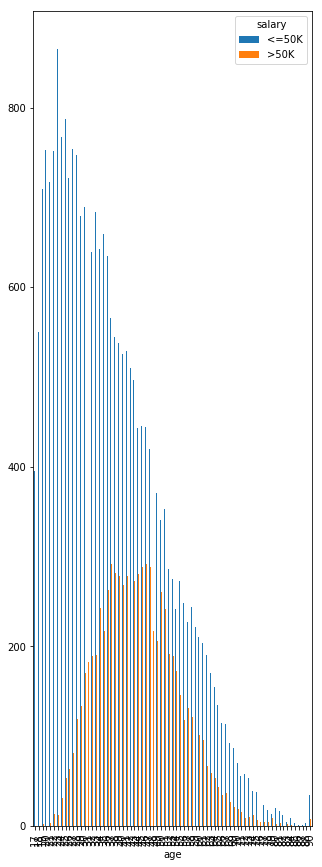

In [34]:
df.pivot_table(index=['age'],columns=['salary'],values='final_weight',aggfunc='count').plot.bar(figsize=(10,7))

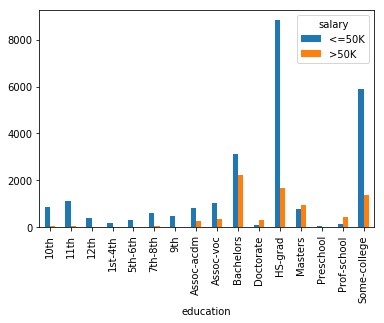

In [30]:
df.pivot_table(index=['education'],columns='salary',values='final_weight',aggfunc='count').plot.bar()

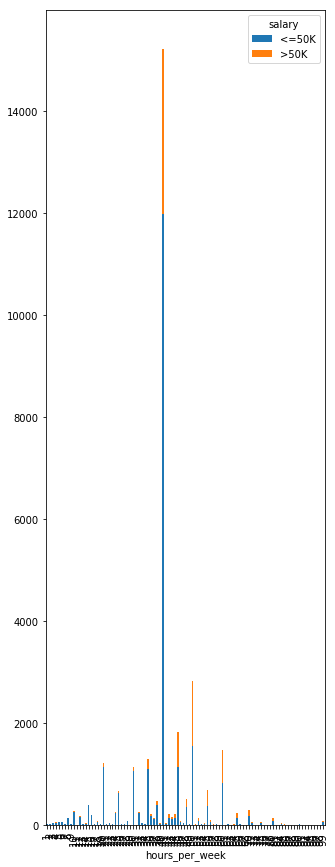

In [35]:
df.pivot_table(index=['hours_per_week'],columns='salary',values='final_weight',aggfunc='count').plot.bar(stacked=True,figsize=(10, 7))

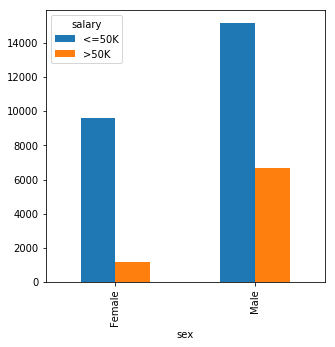

In [32]:
df.pivot_table(index=['sex'],columns=['salary'],values='final_weight',aggfunc='count').plot.bar(figsize=(5,5))

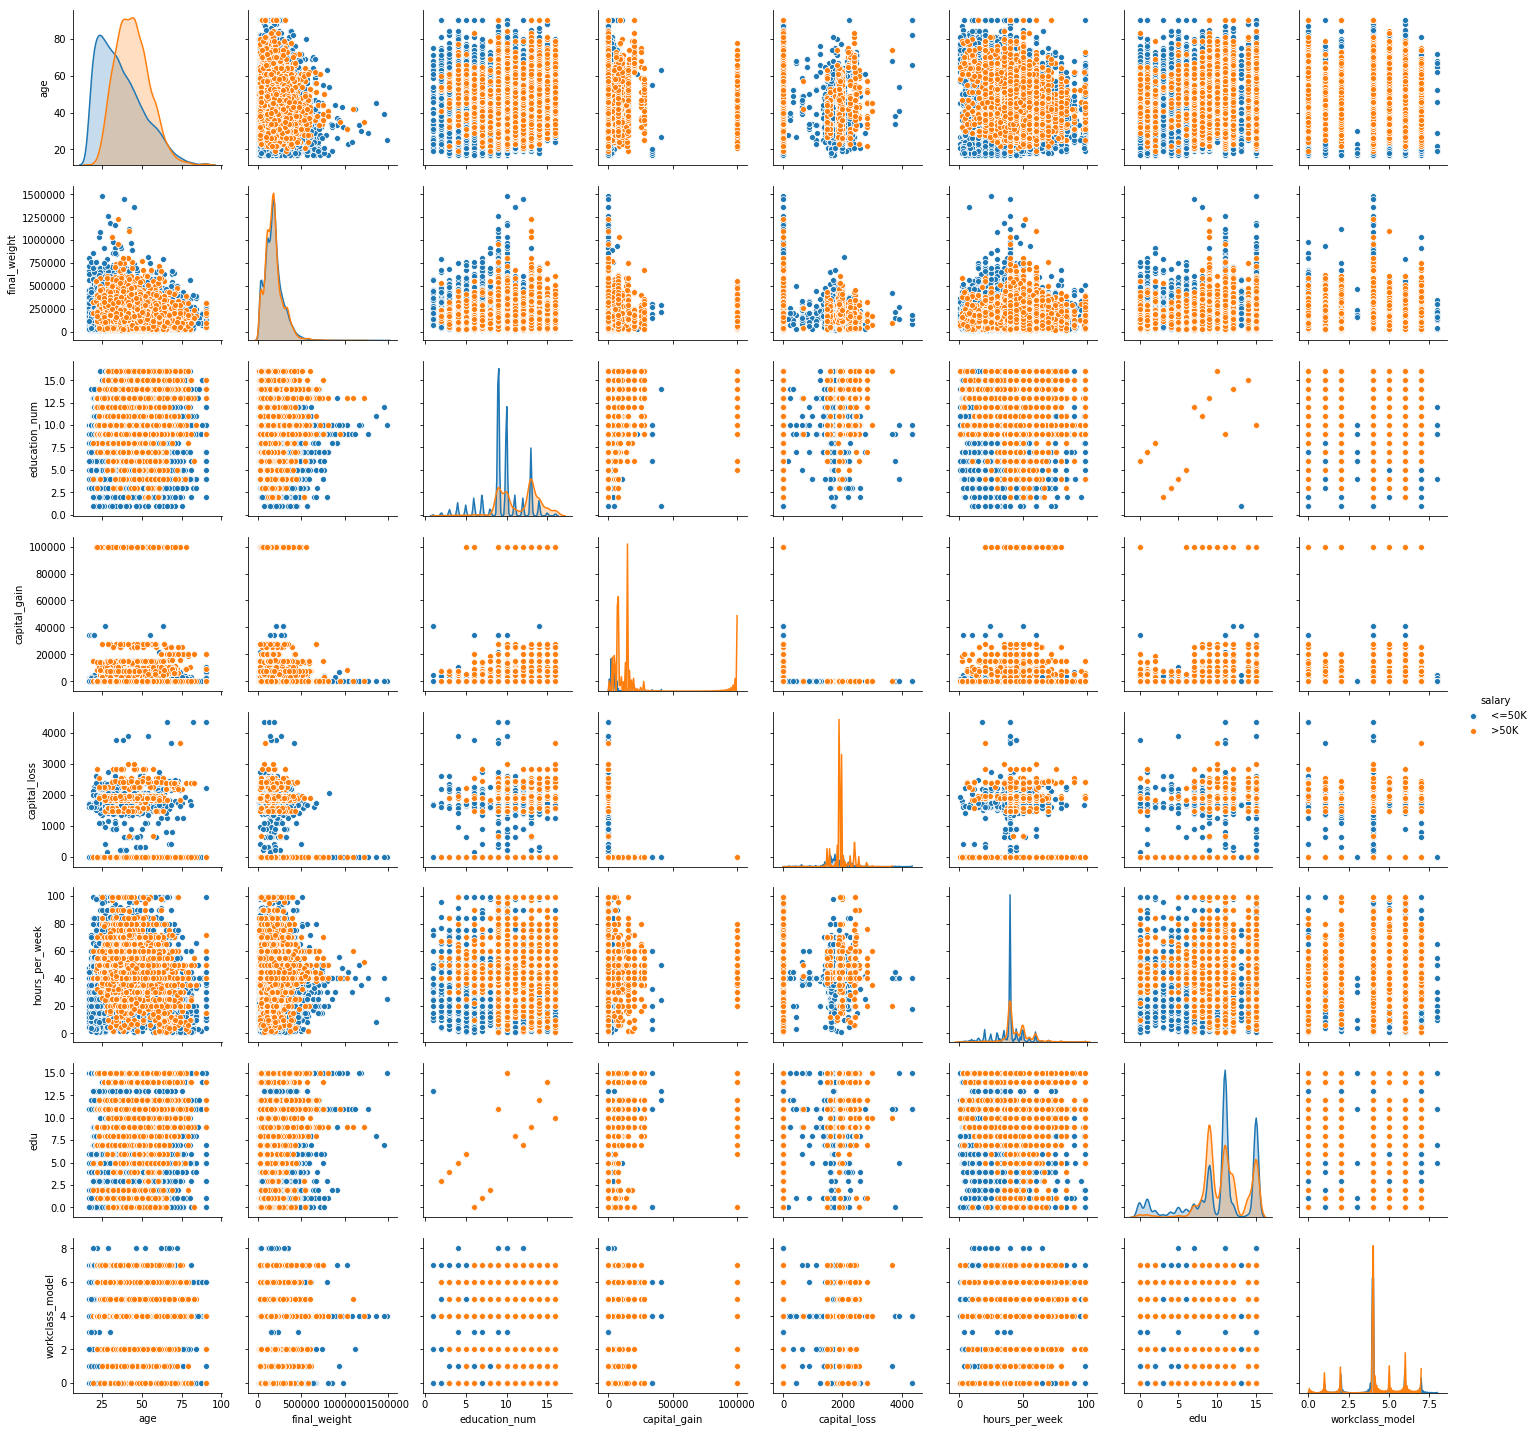

In [33]:
sns.pairplot(df,hue='salary')

In [31]:
handle = open('New Text Document.txt')

In [32]:
d = dict()

In [33]:
for line in handle:
    if not line.startswith('From'):
        continue
    else:
        line = line.split()
        email = line[1]
        time = line[2]
        d[email] = d.get(email,0) + 1
        

In [34]:
d

{'abc@1234.com': 1, 'abcd@1234.com': 1}

In [43]:
sorted(d.keys())

['abc@1234.com', 'abcd@1234.com']

In [44]:
d['abc@1234.com']

1

In [45]:
line = 'From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008'


In [47]:
line.split()[5][0:2]

'09'